# Boston Housing DataSet


In [1]:
import sklearn as skl
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\parth\\Downloads\\Internship\\housing.csv")

In [3]:
df


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
X=df.drop('medv',axis=1)
Y=df['medv']

In [6]:
X.shape


(506, 13)

In [7]:
Y.shape


(506,)

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [9]:
bestFeatures=SelectKBest(score_func=f_regression,k='all')
fit=bestFeatures.fit(X,Y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat((dfcolumns,dfscores),axis=1)

In [10]:
featureScores


,0,0
0,crim,89.486115
1,zn,75.257642
2,indus,153.954883
3,chas,15.971512
4,nox,112.591480
5,rm,471.846740
6,age,83.477459
7,dis,33.579570
8,rad,85.914278
9,tax,141.761357


In [11]:
from sklearn.ensemble import ExtraTreesRegressor

In [12]:
model=ExtraTreesRegressor()
model.fit(X,Y)
model.feature_importances_

array([0.03521555, 0.0061976 , 0.04180775, 0.01277816, 0.03525606,
       0.33539667, 0.01838814, 0.03458104, 0.0179132 , 0.03875625,
       0.0618261 , 0.01880035, 0.34308314])

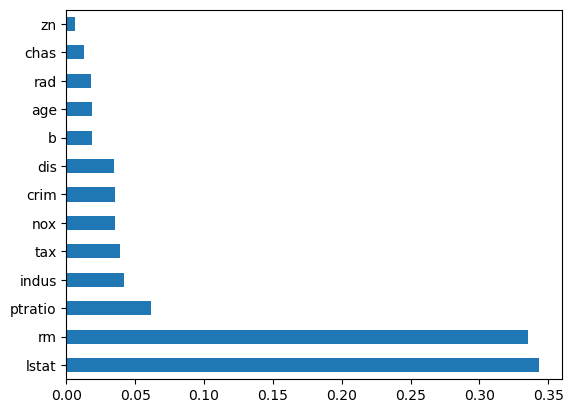

In [13]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(13).plot(kind='barh')
plt.show()

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [15]:
lr=GradientBoostingRegressor()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.3)
lr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [16]:
y_pred=lr.predict(X_test)

In [17]:
print(r2_score(Y_test,y_pred))

0.844638359479784


In [18]:
user_input=np.array([[0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03]])
y_pred=lr.predict(user_input)
print(y_pred)

[34.61009839]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
